In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime


## Loading and preparing the data

In [100]:
# stop_events = pd.read_csv("../data_files/B/once/75days/stop_events_with_geo_train_test_averages.feather")

results = pd.read_csv("post_noise_width_time_threshold_test2.csv")
results['area'] = (results['width'] * 2 + 1) * ((results['time'] - 20)/10)
results.sort_values('pass_fraction', ascending=False).head()



,width,time,threshold,threshold_pass_fraction,mean_weights,pass_count,pass_fraction,area
605,10,230,140,0.817147,534.853891,3651563,0.404713,441.0
604,10,230,120,0.841934,522.945841,3651313,0.404685,441.0
512,8,260,100,0.849369,470.031817,3651151,0.404667,408.0
513,8,260,120,0.819055,483.335985,3650898,0.404639,408.0
499,8,230,100,0.839726,437.465519,3650833,0.404632,357.0


In [103]:
results[results['width'] >= 10].sort_values('pass_fraction', ascending=False).head(30)

,width,time,threshold,threshold_pass_fraction,mean_weights,pass_count,pass_fraction,area
605,10,230,140,0.817147,534.853891,3651563,0.404713,441.0
604,10,230,120,0.841934,522.945841,3651313,0.404685,441.0
592,10,200,140,0.799170,472.671709,3650297,0.404573,378.0
590,10,200,100,0.855642,449.421032,3649969,0.404536,378.0
591,10,200,120,0.827231,461.066259,3649883,0.404527,378.0
603,10,230,100,0.868725,510.226028,3649472,0.404481,441.0
593,10,200,160,0.770373,484.713354,3649462,0.404480,378.0
606,10,230,160,0.792988,546.563073,3649315,0.404464,441.0
589,10,200,80,0.886009,437.120149,3648881,0.404416,378.0
594,10,200,180,0.741956,496.747930,3648770,0.404403,378.0


In [3]:
best_threshold = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width','time'])

In [4]:
best_threshold = best_threshold.reset_index()
best_threshold = best_threshold[['width', 'time', 'pass_fraction']]
best_threshold=best_threshold.pivot('width', 'time')

In [5]:
X=[x[1] for x in best_threshold.columns.values]
Y=best_threshold.index.values.astype(float) * 2 + 1
# Z=best_threshold.values * 100
Z=np.clip(best_threshold.values * 100, 40, 50)

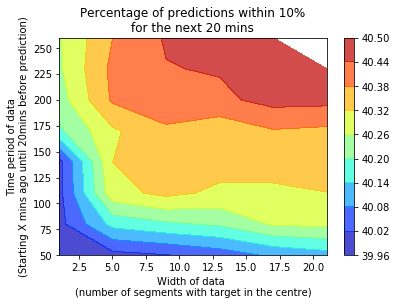

In [6]:

Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.xlabel("Width of data \n(number of segments with target in the centre)")
plt.ylabel("Time period of data\n(Starting X mins ago until 20mins before prediction)")
plt.title("Percentage of predictions within 10%\nfor the next 20 mins")
plt.colorbar()
plt.show()

In [7]:
best_width = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['time', 'threshold'])

In [8]:
best_width = best_width.reset_index()
best_width = best_width[['time', 'threshold', 'pass_fraction']]
best_width = best_width.pivot('time', 'threshold')

In [9]:
X=[x[1] for x in best_width.columns.values]
Y=best_width.index.values.astype(float)
Z=np.clip(best_width.values * 100, 40, 50)
# Z=best_width.values * 100

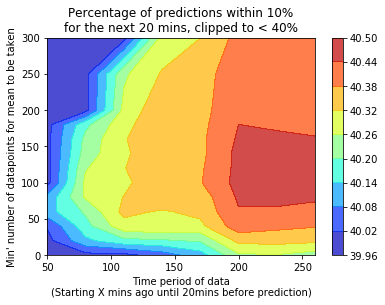

In [10]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Time period of data\n(Starting X mins ago until 20mins before prediction)")
plt.title("Percentage of predictions within 10%\nfor the next 20 mins, clipped to < 40%")
plt.colorbar()
plt.show()

In [11]:
best_time = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width', 'threshold'])

In [12]:
best_time = best_time.reset_index()
best_time = best_time[['width', 'threshold', 'pass_fraction']]
best_time = best_time.pivot('width', 'threshold')

In [13]:
X=[x[1] for x in best_time.columns.values]
Y=best_time.index.values.astype(float) * 2 + 1
Z=np.clip(best_time.values * 100, 40, 50)
# Z=best_time.values

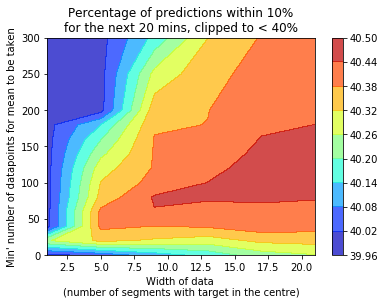

In [14]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Width of data \n(number of segments with target in the centre)")
plt.title("Percentage of predictions within 10%\nfor the next 20 mins, clipped to < 40%")
plt.colorbar()
plt.show()

In [15]:
best_areas = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['area', 'threshold'])

In [16]:
best_areas = best_areas.reset_index()
best_areas = best_areas[['area', 'threshold', 'pass_fraction']]
best_areas = best_areas.pivot('area', 'threshold')

In [17]:
X=[x[1] for x in best_areas.columns.values]
Y=best_areas.index.values.astype(float)
Z=np.clip(best_areas.values * 100, 40, 50)

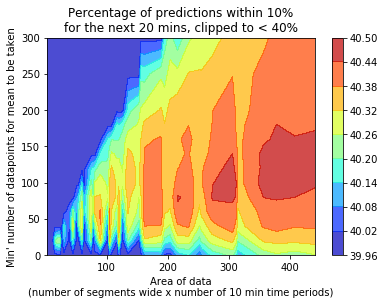

In [18]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Area of data\n(number of segments wide x number of 10 min time periods)")
plt.title("Percentage of predictions within 10%\nfor the next 20 mins, clipped to < 40%")
plt.colorbar()
plt.show()

In [19]:
best_thresholds_1d = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width', 'time'])

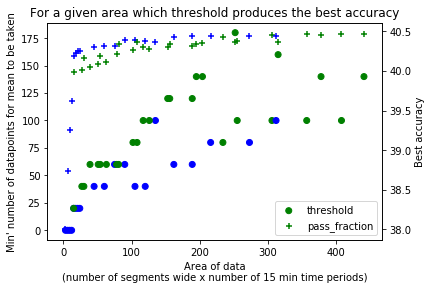

In [45]:
shape = ((best_thresholds_1d['width'] * 2) + 1) / ((best_thresholds_1d['time'] - 20)/10)

colors = ['green' if shape > 0.7 else "blue" for shape in shape.values]

lns1 = plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['threshold'], c=colors)
plt.title("For a given area which threshold produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Min' number of datapoints for mean to be taken")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=4)

plt.show()

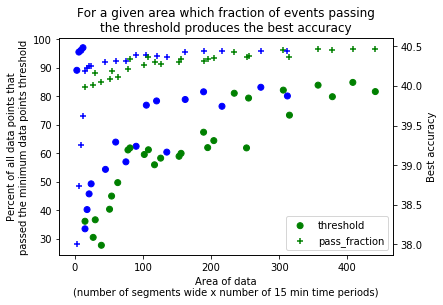

In [46]:
plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['threshold_pass_fraction']*100, c=colors)
plt.title("For a given area which fraction of events passing\nthe threshold produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Percent of all data points that\npassed the minimum data points threshold")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=4)


plt.show()

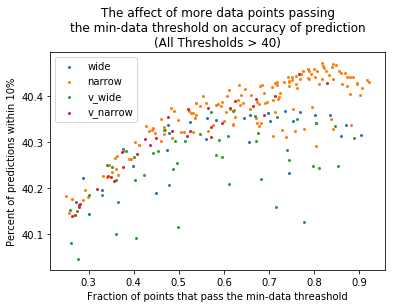

In [99]:
# just_good = best_thresholds_1d[best_thresholds_1d['pass_fraction'] > 0.397]

just_good = results[(results['threshold'] > 40) & (results['pass_fraction'] > 0)]

just_good_shape = ((just_good['width'] * 2) + 1) / ((just_good['time'] - 20)/10)

just_good_colours = ['green' if shape > 1 else "blue" for shape in just_good_shape.values]

wide = ((just_good['width'] * 2) + 1) / ((just_good['time'] - 20)/10) > 1.2
v_wide = ((just_good['width'] * 2) + 1) / ((just_good['time'] - 20)/10) > 1.7
v_narrow = ((just_good['width'] * 2) + 1) / ((just_good['time'] - 20)/10) < 0.4

plt.scatter(just_good[wide & ~v_wide]['threshold_pass_fraction'], just_good[wide & ~v_wide]['pass_fraction']*100, label="wide", s=4)
plt.scatter(just_good[~wide & ~v_narrow]['threshold_pass_fraction'], just_good[~wide & ~v_narrow]['pass_fraction']*100, label="narrow", s=4)
plt.scatter(just_good[v_wide]['threshold_pass_fraction'], just_good[v_wide]['pass_fraction']*100, label="v_wide", s=4)
plt.scatter(just_good[v_narrow]['threshold_pass_fraction'], just_good[v_narrow]['pass_fraction']*100, label="v_narrow", s=4)
plt.xlabel("Fraction of points that pass the min-data threashold")
plt.ylabel("Percent of predictions within 10%")
plt.title("The affect of more data points passing\nthe min-data threshold on accuracy of prediction\n(All Thresholds > 40)")

plt.legend()



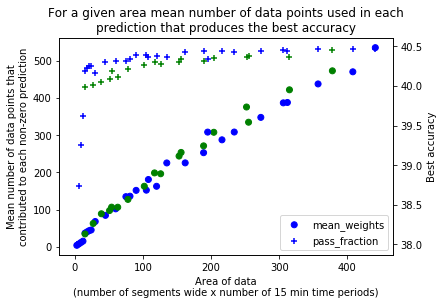

In [22]:
lns1 = plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['mean_weights'], c=colors)
plt.title("For a given area mean number of data points used in each\nprediction that produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Mean number of data points that\ncontributed to each non-zero prediction")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=4)

plt.show()